<center><img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-color.svg" height="100" /></center>

****

# Probability for julia

## Password match

In [6]:
#Password match
using Random
Random.seed!()
passwordlength, nummatchlog = 8, 1
possiblechar = ['a':'z'; 'A':'Z'; '0':'9']
correctPassword = "sd34c4cj"
numMatch(loginPassword) = sum([loginPassword[i] == correctPassword[i] for i in 1:passwordlength])

N = 10^7
passwords = [String(rand(possiblechar, passwordlength)) for _ in 1:N]
numLog = sum([numMatch(p) >= nummatchlog for p in passwords])
println("number of login attempts logged: ", numLog)
println("Proportion of login attempts logged:", numLog/N)


number of login attempts logged: 12197482
Proportion of login attempts logged:0.12197482


## birthday paradox

In [7]:
using StatsBase,Combinatorics,Plots

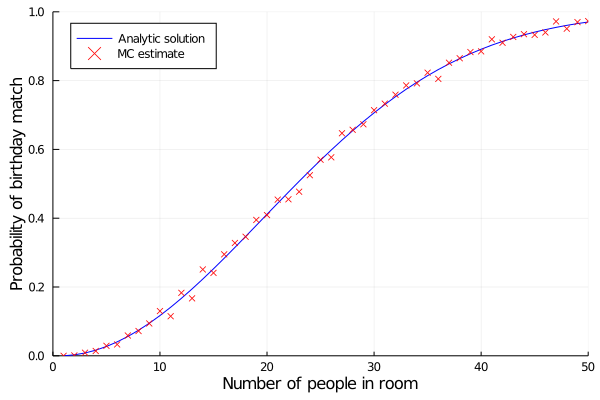

In [23]:
matchExists1(n) = 1 - prod([k/365 for k in 365:-1:365-n+1])
matchExists2(n) = 1 - factorial(365, 365 - big(n))/365^big(n)
function bdEvent(n)
    birthdays = rand(1:365, n)
    daycounts = counts(birthdays, 1:365)
    return maximum(daycounts) > 1
end
probEst(n) = sum([bdEvent(n) for _ in 1:N])/N

xGrid = 1:50
analyticSolution1 = [matchExists1(n) for n in xGrid]
analyticSolution2 = [matchExists2(n) for n in xGrid]

N = 10^3
mcEstimates = [probEst(n) for n in xGrid]

plot(xGrid, analyticSolution1, c=:blue, label="Analytic solution")
scatter!(xGrid, mcEstimates, c=:red, ms=3, msw=1, shape=:xcross,
    label="MC estimate", xlims=(0,50), ylims=(0,1),
    xlabel="Number of people in room",
    ylabel="Probability of birthday match",
    legend=:topleft)

## Sampling with and without replacement

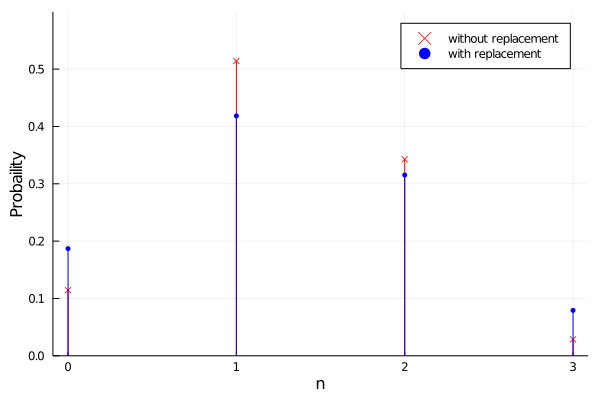

In [26]:
function proportionFished(gF, sF, n::Int, N, withReplacement::Bool = false)
    function fishing()
        fishInPond = [ones(Int64, gF); zeros(Int64, sF)]
        fishCaught = Int64[]
        for fish in 1:n
            fished = rand(fishInPond)
            push!(fishCaught, fished)
            if withReplacement == false
                deleteat!(fishInPond, findfirst(x->x==fished, fishInPond))
            end
        end
        sum(fishCaught)
    end
    simulations = [fishing() for _ in 1:N]
    proportions = counts(simulations, 0:n)/N
    if withReplacement
        plot!(0:n, proportions,
            line=:stem, marker=:circle, c=:blue, ms=3, msw=0,
            label="with replacement",
            xlabel="n",
            ylim=(0, 0.6), ylabel="Probaility")
    else
        plot!(0:n, proportions,
            line=:stem, marker=:xcross, c=:red, ms=3, msw=1, label="without replacement")
    end
end

N = 10^6
goldFish, silverFish, n = 3, 4, 3
plot()
proportionFished(goldFish, silverFish, n, N)
proportionFished(goldFish, silverFish, n, N, true)

## Lattice Paths